Objective:
The objective of this data analysis project is to gain insights into the ecommerce order
data of a fictional company. We will analyze customer information, product details, and
order history to derive meaningful conclusions that can aid business decision-making.


In [1]:
!pip install mysql-connector-python
import pandas as pd
import numpy as np


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import mysql.connector as my 
con=my.connect (
    host="localhost",
    user="root",
    password="shijin",
    database="ecommerce"
)
cr=con.cursor()



In [3]:
#query data from the customer table
cr.execute("select * from customer")
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cr.fetchall(), columns=[desc[0] for desc in
cr.description])

cr.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cr.fetchall(), columns=[desc[0] for desc in
cr.description])

cr.execute('SELECT * FROM product')
product_data = pd.DataFrame(cr.fetchall(), columns=[desc[0] for desc in
cr.description])

#printing first 5 records from each table
print(customer_data.head(),"\n")
print(product_data.head(),"\n")
print(order_data.head(),"\n")



  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     John            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830   

  product_id          product_name     category          sub_category  \
0      P1001        Product Name 1   Category 1        Sub-Category 1   
1      P1002        Product Name 2   Category 2        Sub-Category 2   
2      P1003        Wireless Mouse  Electronics  Computer Access

Data Cleaning:
Before proceeding with the analysis, let's perform some basic data cleaning:
● Check for missing values in each table.
● Ensure data types are appropriate for each column.
● Handle any outliers or inconsistencies.

In [4]:
#Check for missing values in each table

# customer_data.isnull()
# product_data.isnull()
# order_data.isnull()
    

In [5]:
#ensuring datatypes are approprate for each column

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  20 non-null     object
 1   name         20 non-null     object
 2   city         20 non-null     object
 3   email        20 non-null     object
 4   phone_no     20 non-null     object
 5   address      20 non-null     object
 6   pin_code     20 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 1.2+ KB


In [6]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      20 non-null     object 
 1   product_name    20 non-null     object 
 2   category        20 non-null     object 
 3   sub_category    20 non-null     object 
 4   original_price  20 non-null     float64
 5   selling_price   20 non-null     float64
 6   stock           20 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ KB


In [7]:
order_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      20 non-null     int64         
 1   customer_id   20 non-null     object        
 2   product_id    20 non-null     object        
 3   quantity      20 non-null     float64       
 4   total_price   20 non-null     float64       
 5   payment_mode  20 non-null     object        
 6   order_date    20 non-null     datetime64[ns]
 7   order_status  20 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.4+ KB


In [8]:
# detecting outliers and inconsistencies in the dataframe
customer_data.isna()
product_data.isna()
order_data.isna()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


Exploratory Data Analysis (EDA) and Visualization:

In [9]:
# Costomer Analysis

# Identify the total number of customers City Wise


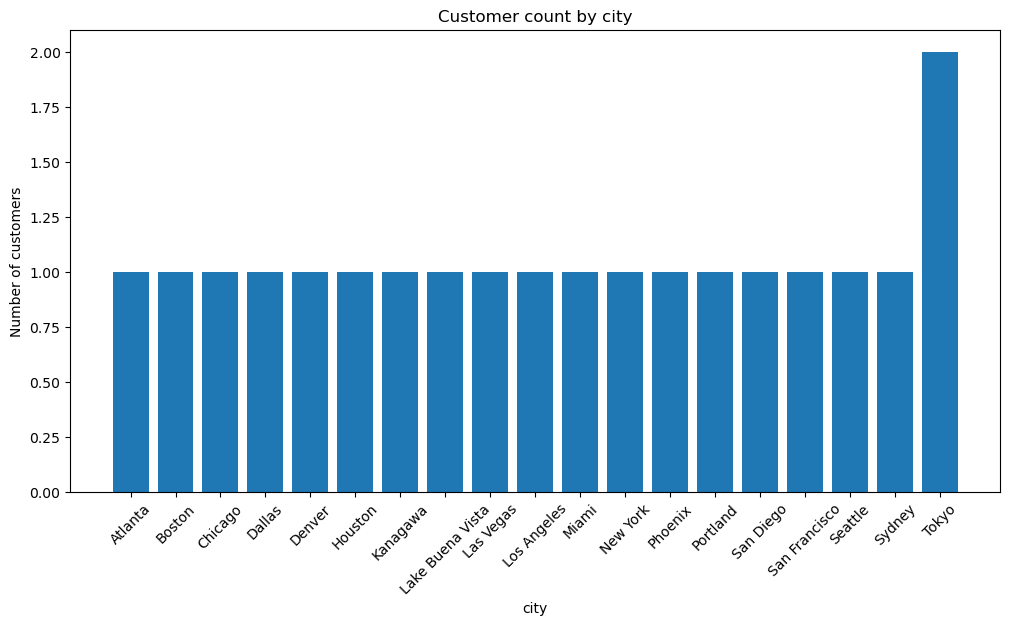

In [10]:
import matplotlib.pyplot as plt
result=customer_data.groupby('city')['customer_id'].count()

cities=result.index
No_of_customers=result.values


plt.figure(figsize=(12,6))
plt.bar(cities,No_of_customers)
plt.xlabel('city')
plt.ylabel('Number of customers')
plt.title('Customer count by city')

plt.xticks(rotation=45)

plt.show()


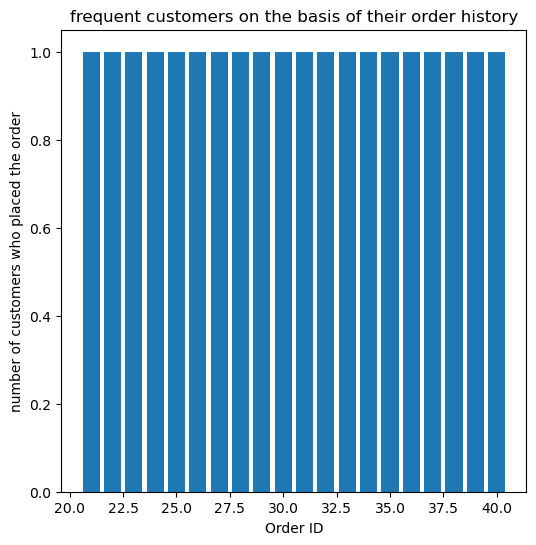

In [11]:
# Identify most frequent customers on the basis of their order history
import pandas as pd

merged_data=pd.merge(order_data,customer_data,on='customer_id')

customer_counts=merged_data.groupby('order_id')['customer_id'].count().reset_index(name='customer_count')

plt.figure(figsize=(6,6))
plt.bar(customer_counts['order_id'],customer_counts['customer_count'])
plt.xlabel("Order ID")
plt.ylabel("number of customers who placed the order")
plt.title("frequent customers on the basis of their order history")
plt.show()




# plt.figure(figsize=(10, 6))
# plt.bar(['order_id'], df['no_of_customers'], color='skyblue')
# plt.xlabel('Order ID')
# plt.ylabel('Number of Customers')
# plt.title('Number of Customers Based on Order ID')
# plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# plt.show()


Product Analysis:
● Determine the total number of products available by category.
● Analyze the distribution of products across sub-categories.
● Identify products with low stock levels.
● Calculate the average, maximum, and minimum prices for products.


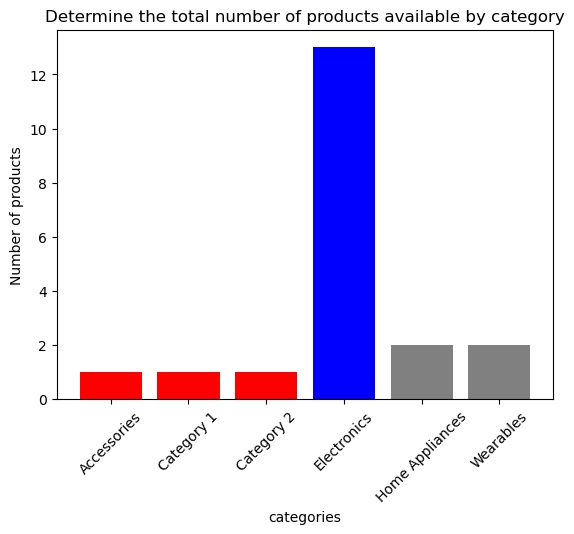

In [12]:
# Determine the total number of products available by category
product_counts=product_data.groupby('category')['product_id'].count().reset_index(name='product_count')

max_count = product_counts['product_count'].max()
min_count = product_counts['product_count'].min()

# Step 3: Assign colors based on counts
colors = ['blue' if count == max_count else 'red' if count == min_count else 'grey' for count in product_counts['product_count']]
plt.bar(product_counts['category'],product_counts['product_count'],color=colors)
plt.xlabel("categories")
plt.ylabel("Number of products")
plt.title("Determine the total number of products available by category")
plt.xticks(rotation=45)
plt.show()

# product_data.head()

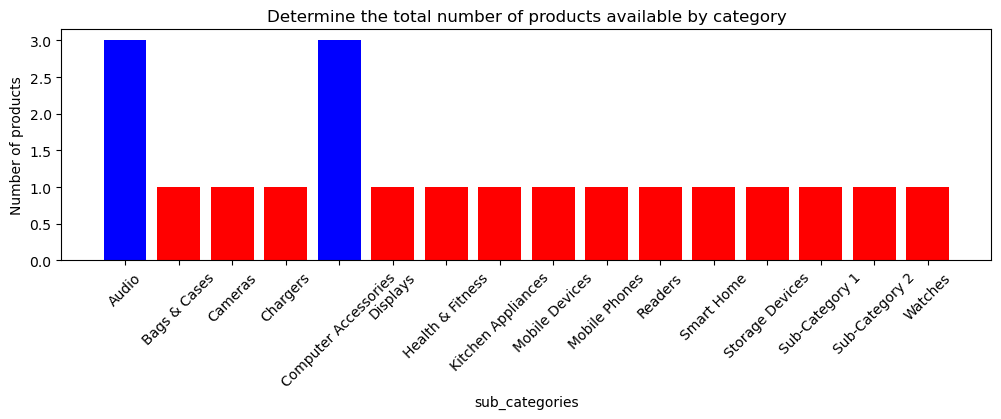

In [13]:
# ● Analyze the distribution of products across sub-categories.
product_counts=product_data.groupby('sub_category')['product_name'].count().reset_index(name='product_count')

max_count = product_counts['product_count'].max()
min_count = product_counts['product_count'].min()

# Step 3: Assign colors based on counts
colors = ['blue' if count == max_count else 'red' if count == min_count else 'grey' for count in product_counts['product_count']]
plt.figure(figsize=(12,3))
plt.bar(product_counts['sub_category'],product_counts['product_count'],color=colors)
plt.xlabel("sub_categories")
plt.ylabel("Number of products")
plt.title("Determine the total number of products available by category")
plt.xticks(rotation=45)
plt.show()

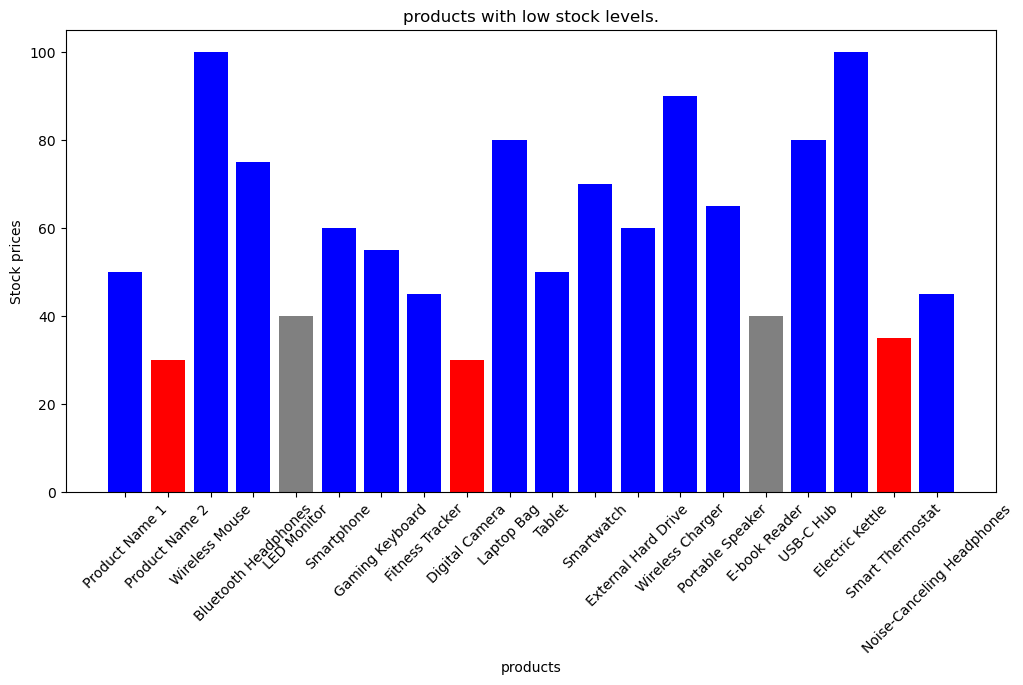

In [14]:
# Identify products with low stock levels.

products=product_data['product_name']
stock_prices=product_data['stock']

colors=['red' if stock<40 else 'blue' if stock>40 else 'grey' for stock in product_data['stock']]
plt.figure(figsize=(12,6))
plt.bar(products,stock_prices,color=colors)
plt.xlabel('products')
plt.ylabel('Stock prices')
plt.xticks(rotation=45)
plt.title('products with low stock levels.')
plt.show()


In [15]:

# Calculate average, maximum, and minimum prices for the products

average_price = product_data[['original_price', 'selling_price']].mean()
max_price = product_data[['original_price', 'selling_price']].max()
min_price = product_data[['original_price', 'selling_price']].min()

# Display the results
print("Average Prices:\n", average_price)
print("\nMaximum Prices:\n", max_price)
print("\nMinimum Prices:\n", min_price)


Average Prices:
 original_price    109.50
selling_price     133.25
dtype: float64

Maximum Prices:
 original_price    300.0
selling_price     350.0
dtype: float64

Minimum Prices:
 original_price    20.0
selling_price     25.0
dtype: float64


Order Analysis:
● Calculate the top 10 orders product wise.
● Analyze the order status distribution (e.g., pending, delivered).
● Identify the most popular products based on order quantity.


In [ ]:
# Calculate the top 10 orders product wise
merged_table=pd.merge(product_data,order_data,on='product_id')
orders=merged_table.groupby('product_name')['order_id'].count().reset_index(name='no_of_orders')
sorted_order=orders.sort_values(by=['product_name','no_of_orders'],ascending=[False,False])
print(sorted_order)


                  product_name  no_of_orders
16              Wireless Mouse             1
15            Wireless Charger             1
14                   USB-C Hub             1
13                      Tablet             1
12                  Smartwatch             2
11            Smart Thermostat             1
10              Product Name 2             1
9               Product Name 1             2
8   Noise-Canceling Headphones             2
7                  LED Monitor             1
6              Gaming Keyboard             1
5              Fitness Tracker             1
4          External Hard Drive             1
3              Electric Kettle             1
2                E-book Reader             1
1               Digital Camera             1
0         Bluetooth Headphones             1


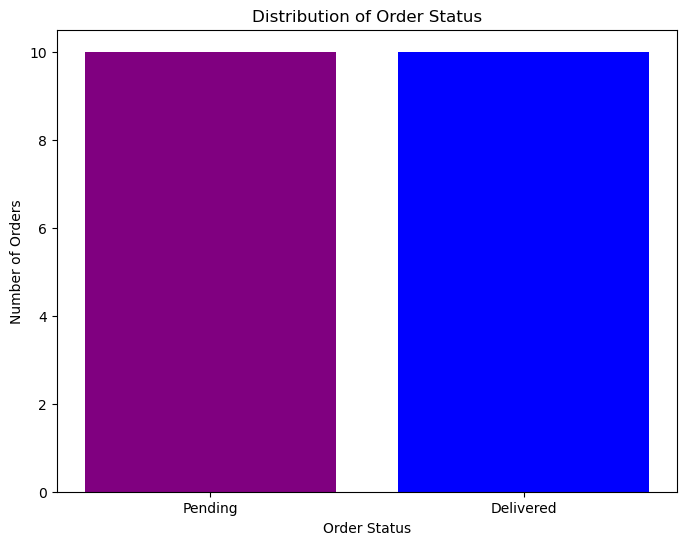

In [ ]:
#  Analyze the order status distribution (e.g., pending, delivered).
status_counts = order_data['order_status'].value_counts()

# Step 2: Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(status_counts.index, status_counts.values, color=['purple','blue'])
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Status')
plt.show()


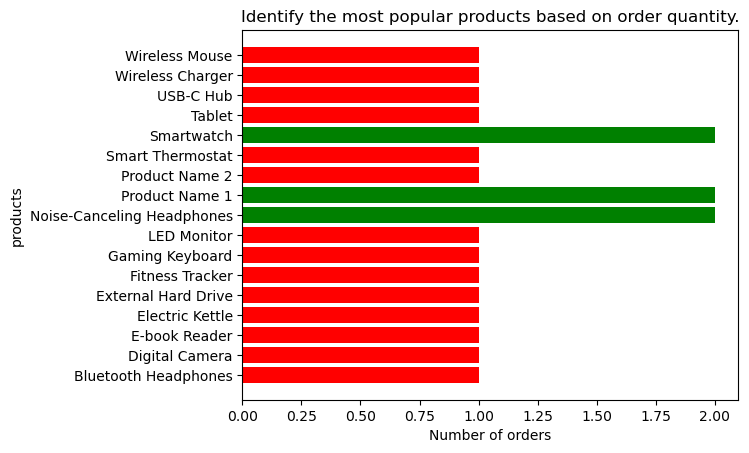

In [ ]:
#  Identify the most popular products based on order quantity.

merged_tables=pd.merge(product_data,order_data,on='product_id')
orders=merged_tables.groupby('product_name')['quantity'].count().reset_index(name='no_of_orders')
# sorted_order=orders.sort_values(by=['product_name','no_of_orders'],ascending=[False,False])
# print(sorted_order)
colors=['red' if count<2 else 'ligthblue' if count>2 else 'green' for count in orders['no_of_orders']]
plt.barh(orders['product_name'],orders['no_of_orders'],color=colors)
plt.xlabel('Number of orders')
plt.ylabel('products')
plt.title("Identify the most popular products based on order quantity.")
plt.show()



Sales Analysis:
● Calculate total revenue generated from orders product wise.
● Calculate the total revenue generated from all orders
● Calculate total revenue product category wise percentage.
● Analyze the performance of different product categories in terms of sales.
● Identify the most profitable products based on the difference between
original and selling prices.

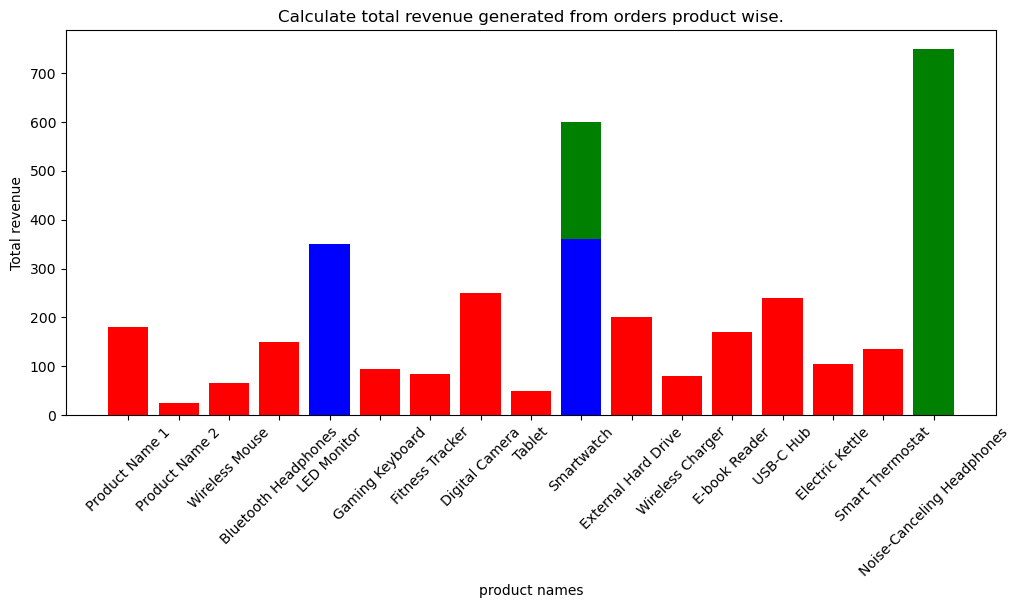

In [ ]:
# ● Calculate total revenue generated from orders product wise.
merged_data=pd.merge(product_data,order_data,on='product_id')
merged_data['revenue']=order_data['quantity']*product_data['selling_price']
colors=['green' if cost>400 else 'red' if cost<300 else 'blue' for cost in merged_data['revenue']]
plt.figure(figsize=(12,5))
plt.bar(merged_data['product_name'],merged_data['revenue'],color=colors)
plt.xlabel('product names')
plt.ylabel('Total revenue')
plt.xticks(rotation=45)
plt.title("Calculate total revenue generated from orders product wise.")
plt.show()


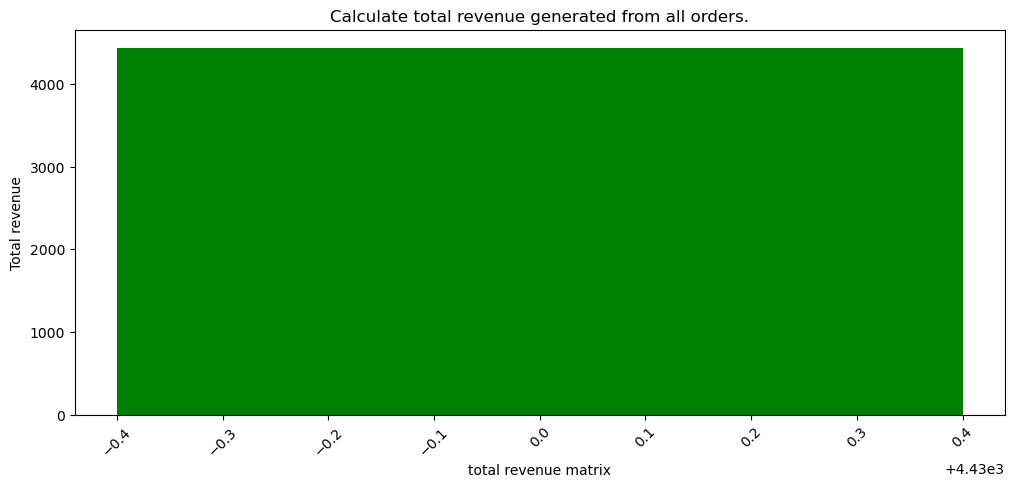

In [ ]:
# ● Calculate total revenue generated from all the orders .
merged_data=pd.merge(product_data,order_data,on='product_id')
merged_data['revenue']=order_data['quantity']*product_data['selling_price']
merged_data['total_revenue']=merged_data['revenue'].sum()
colors=['green' if cost>400 else 'red' if cost<300 else 'blue' for cost in merged_data['revenue']]
plt.figure(figsize=(12,5))
plt.bar(merged_data['total_revenue'],merged_data['total_revenue'],color=colors)
plt.xlabel('total revenue matrix')
plt.ylabel('Total revenue')
plt.xticks(rotation=45)
plt.title("Calculate total revenue generated from all orders.")
plt.show()

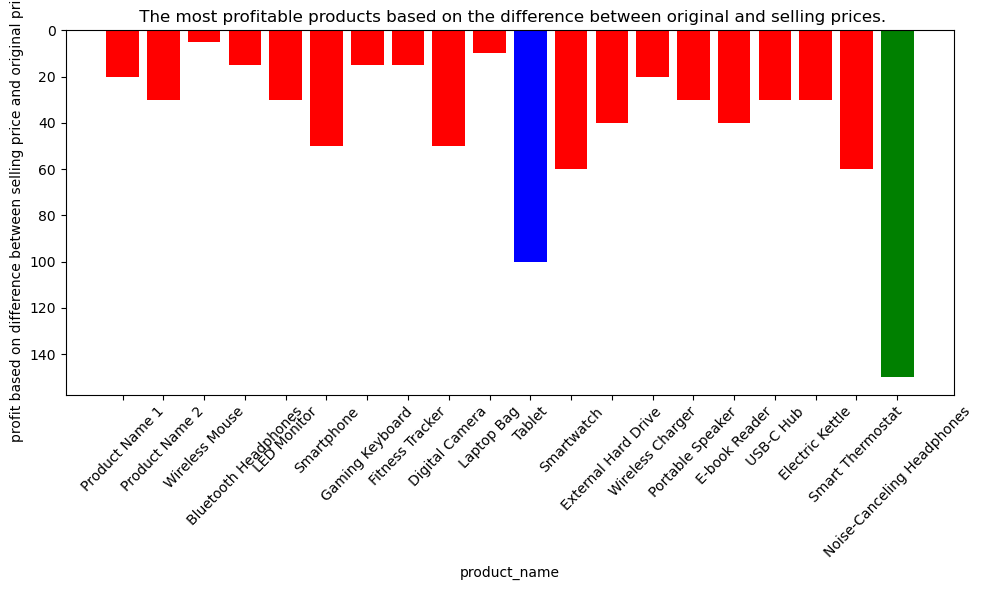

In [ ]:
# Identify the most profitable products based on the difference between original and selling prices.

merged_data=pd.merge(product_data,order_data,on='product_id')
product_data['profit']=product_data['selling_price']-product_data['original_price']
merged_data['revenue']=order_data['quantity']*product_data['profit']
colors=['green' if cost > 100 else 'blue' if cost==100 else 'red' for cost in merged_data['revenue']]

plt.figure(figsize=(10,6))
plt.bar(product_data['product_name'],merged_data['revenue'],color=colors)
plt.xlabel('product_name')
plt.ylabel('profit based on difference between selling price and original price')
plt.title(' The most profitable products based on the difference between original and selling prices.')
plt.xticks(rotation=46)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

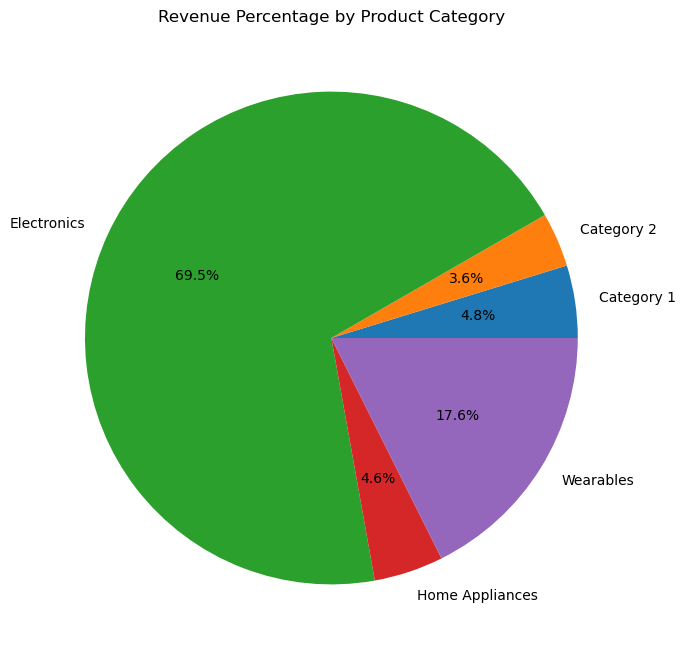

In [21]:
# # Calculate total revenue product category wise percentage.
# merged_data=pd.merge(product_data,order_data,on='product_id')
# merged_data['revenue']=order_data['quantity']*product_data['selling_price']
# category_wise=merged_data.groupby('category')['revenue'].sum().reset_index()
# merged_data['overall_total_revenue']=category_wise['revenue'].sum()
# merged_data['percentage_revenue']=(category_wise['revenue']/merged_data['overall_total_revenue'])*100

# plt.pie(merged_data['percentage_revenue'],merged_data['category'])
# plt.show()

#  Merge the DataFrames on 'product_id'
merged_data = pd.merge(product_data, order_data, on='product_id')

# Calculate the revenue for each order
merged_data['revenue'] = merged_data['quantity'] * merged_data['selling_price']

# Calculate the total revenue per category
category_wise_revenue = merged_data.groupby('category')['revenue'].sum().reset_index()

# Calculate the overall total revenue
overall_total_revenue = category_wise_revenue['revenue'].sum()

# Calculate the percentage of total revenue for each category
category_wise_revenue['percentage_revenue'] = (category_wise_revenue['revenue'] / overall_total_revenue) * 100

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_wise_revenue['percentage_revenue'], labels=category_wise_revenue['category'], autopct='%1.1f%%')
plt.title('Revenue Percentage by Product Category')
plt.show()

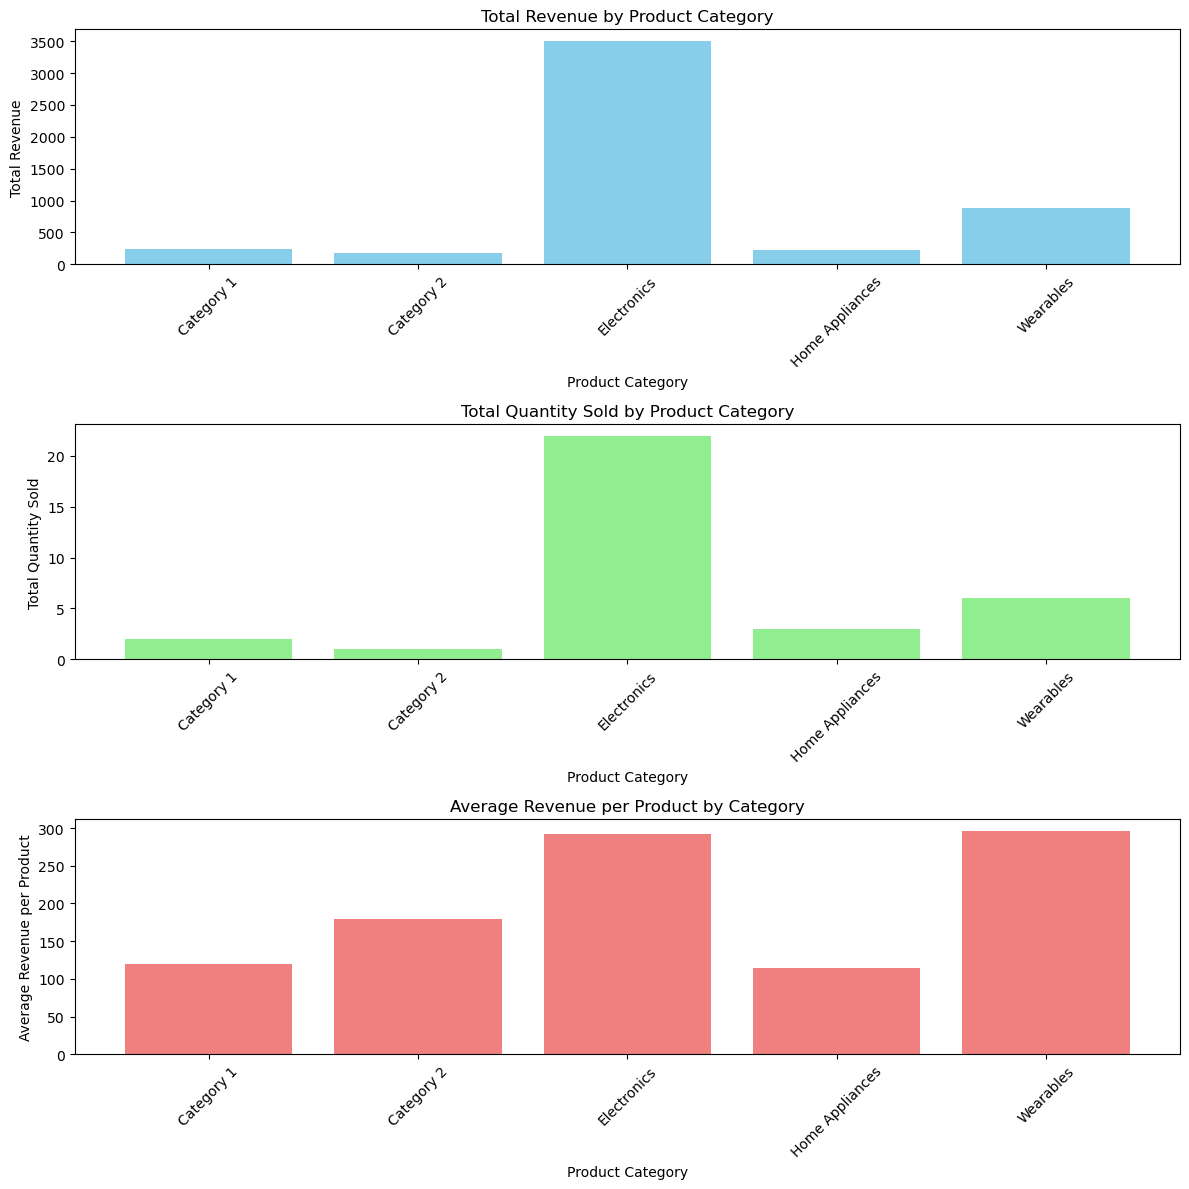

In [27]:
#  Analyze the performance of different product categories in terms of sales.

# import pandas as pd
# import matplotlib.pyplot as plt

# Example DataFrames (replace with your actual data)
# order_data = pd.DataFrame({
#     'product_id': [...],
#     'quantity': [...],
#     'selling_price': [...]
# })

# product_data = pd.DataFrame({
#     'product_id': [...],
#     'category': [...],
# })

# Merge the DataFrames on 'product_id'
merged_data = pd.merge(order_data, product_data, on='product_id')

# Calculate the revenue for each order
merged_data['revenue'] = merged_data['quantity'] * merged_data['selling_price']

# Calculate total revenue per category
category_revenue = merged_data.groupby('category')['revenue'].sum().reset_index()

# Calculate total quantity sold per category
category_quantity = merged_data.groupby('category')['quantity'].sum().reset_index()

# Calculate average revenue per product in each category
category_avg_revenue = merged_data.groupby('category')['revenue'].mean().reset_index()

# Merge the calculated data for visualization
category_performance = pd.merge(category_revenue, category_quantity, on='category')
category_performance = pd.merge(category_performance, category_avg_revenue, on='category', suffixes=('_total', '_avg'))

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# Plotting total revenue per category
axs[0].bar(category_performance['category'], category_performance['revenue_total'], color='skyblue')
axs[0].set_title('Total Revenue by Product Category')
axs[0].set_xlabel('Product Category')
axs[0].set_ylabel('Total Revenue')
axs[0].tick_params(axis='x', rotation=45)

# Plotting total quantity sold per category
axs[1].bar(category_performance['category'], category_performance['quantity'], color='lightgreen')
axs[1].set_title('Total Quantity Sold by Product Category')
axs[1].set_xlabel('Product Category')
axs[1].set_ylabel('Total Quantity Sold')
axs[1].tick_params(axis='x', rotation=45)

# Plotting average revenue per product in each category
axs[2].bar(category_performance['category'], category_performance['revenue_avg'], color='lightcoral')
axs[2].set_title('Average Revenue per Product by Category')
axs[2].set_xlabel('Product Category')
axs[2].set_ylabel('Average Revenue per Product')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Customer Order Patterns:
● Identify product names with the highest and lowest order quantities.
● Identify customers with the highest and lowest order quantities by
customer name.
● Determine the most preferred payment modes.

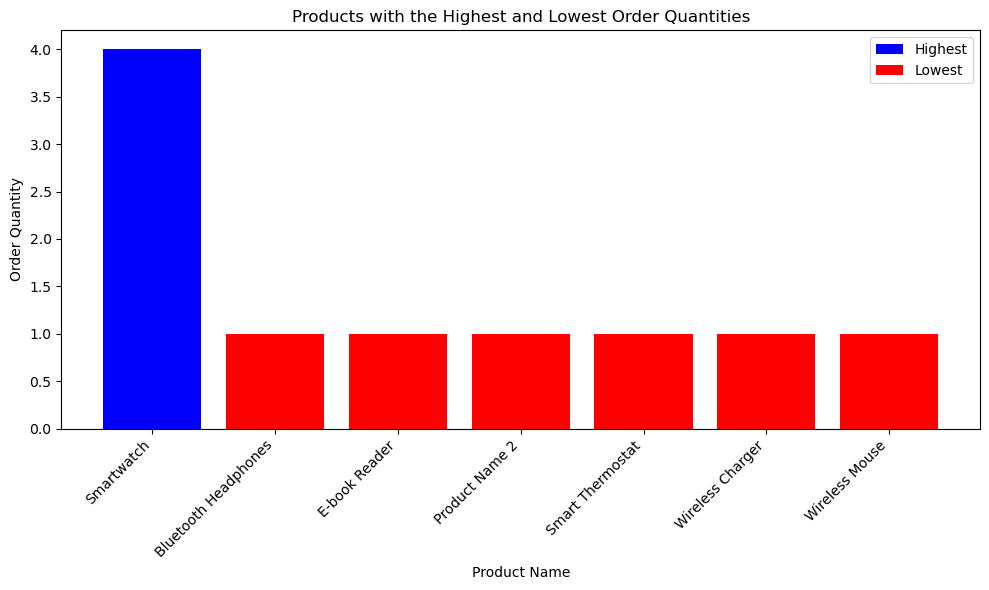

In [39]:
# Identify product names with the highest and lowest order quantities.
# merged_data=pd.merge(product_data,order_data,on='product_id')
# product_quantities=merged_data.groupby('product_name')['quantity'].sum().reset_index(name='product_wise_quantities')
# highest=product_quantities['product_wise_quantities'].max()
# lowest=product_quantities['product_wise_quantities'].min()


import pandas as pd
import matplotlib.pyplot as plt

# Merging the product_data and order_data on 'product_id'
merged_data = pd.merge(product_data, order_data, on='product_id')

# Calculating total quantities ordered per product
product_quantities = merged_data.groupby('product_name')['quantity'].sum().reset_index(name='product_wise_quantities')

# Identifying the highest and lowest order quantities
highest_quantity = product_quantities['product_wise_quantities'].max()
lowest_quantity = product_quantities['product_wise_quantities'].min()

# Finding the product names with the highest order quantities
highest_products = product_quantities[product_quantities['product_wise_quantities'] == highest_quantity]

# Finding the product names with the lowest order quantities
lowest_products = product_quantities[product_quantities['product_wise_quantities'] == lowest_quantity]

# Plotting the highest and lowest products
plt.figure(figsize=(10, 6))

# Plotting highest product
plt.bar(highest_products['product_name'], highest_products['product_wise_quantities'], color='blue', label='Highest')

# Plotting lowest product
plt.bar(lowest_products['product_name'], lowest_products['product_wise_quantities'], color='red', label='Lowest')

# Adding labels and title
plt.xlabel('Product Name')
plt.ylabel('Order Quantity')
plt.title('Products with the Highest and Lowest Order Quantities')
plt.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()



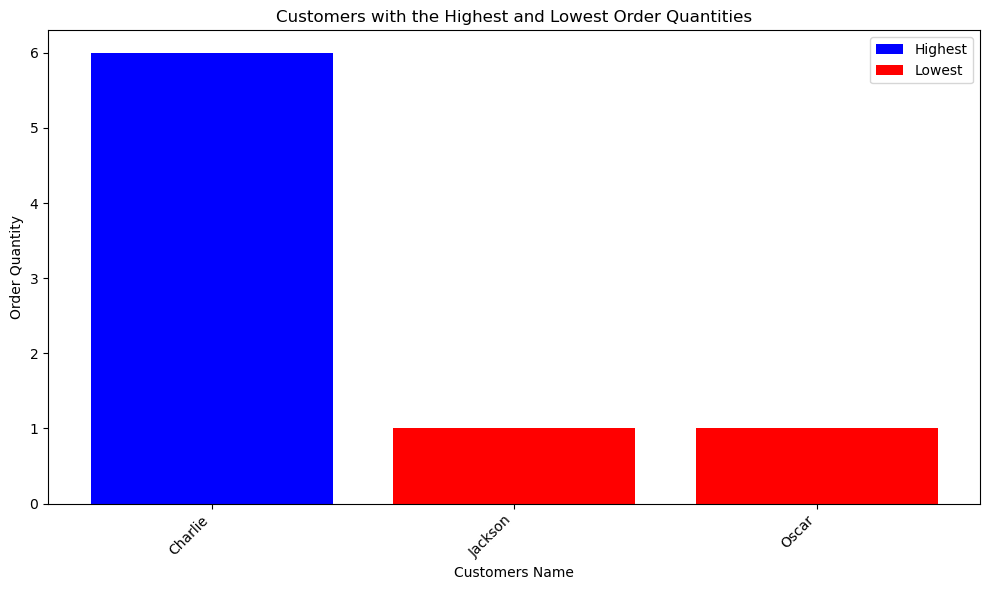

In [155]:
# Identify customers with highest and lowest orders quantities with customer name.

merged_data = pd.merge(customer_data, order_data, on='customer_id')

# Calculating total quantities ordered per product
product_quantities = merged_data.groupby('name')['quantity'].sum().reset_index(name='customer_wise_quantities')

# Identifying the highest and lowest order quantities
highest_quantity = product_quantities['customer_wise_quantities'].max()
lowest_quantity = product_quantities['customer_wise_quantities'].min()

# Finding the product names with the highest order quantities
highest_products = product_quantities[product_quantities['customer_wise_quantities'] == highest_quantity]

# Finding the product names with the lowest order quantities
lowest_products = product_quantities[product_quantities['customer_wise_quantities'] == lowest_quantity]

# Plotting the highest and lowest products
plt.figure(figsize=(10, 6))

# Plotting highest product
plt.bar(highest_products['name'], highest_products['customer_wise_quantities'], color='blue', label='Highest')

# Plotting lowest product
plt.bar(lowest_products['name'], lowest_products['customer_wise_quantities'], color='red', label='Lowest')

# Adding labels and title
plt.xlabel('Customers Name')
plt.ylabel('Order Quantity')
plt.title('Customers with the Highest and Lowest Order Quantities')
plt.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

  payment_mode  count
0          COD     20


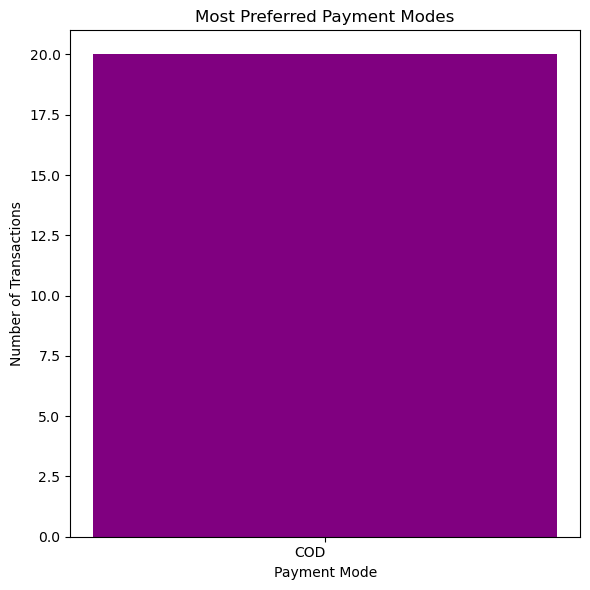

In [54]:
# Determine the most preferred payment modes.
payment_counts=order_data['payment_mode'].value_counts().reset_index()
payment_counts=payment_counts.sort_values(by='count',ascending=False)
print(payment_counts)

plt.figure(figsize=(6, 6))
plt.bar(payment_counts['payment_mode'], payment_counts['count'], color='purple', label='most preffered')

# Adding labels and title

plt.xlabel('Payment Mode')
plt.ylabel('Number of Transactions')
plt.title('Most Preferred Payment Modes')
plt.xticks(rotation=0, ha='right')

# Display the plot
plt.tight_layout()
plt.show()



Time-based Analysis:
● Month wise total sales.
● Month and year wise total sales
● Identify peak order date.

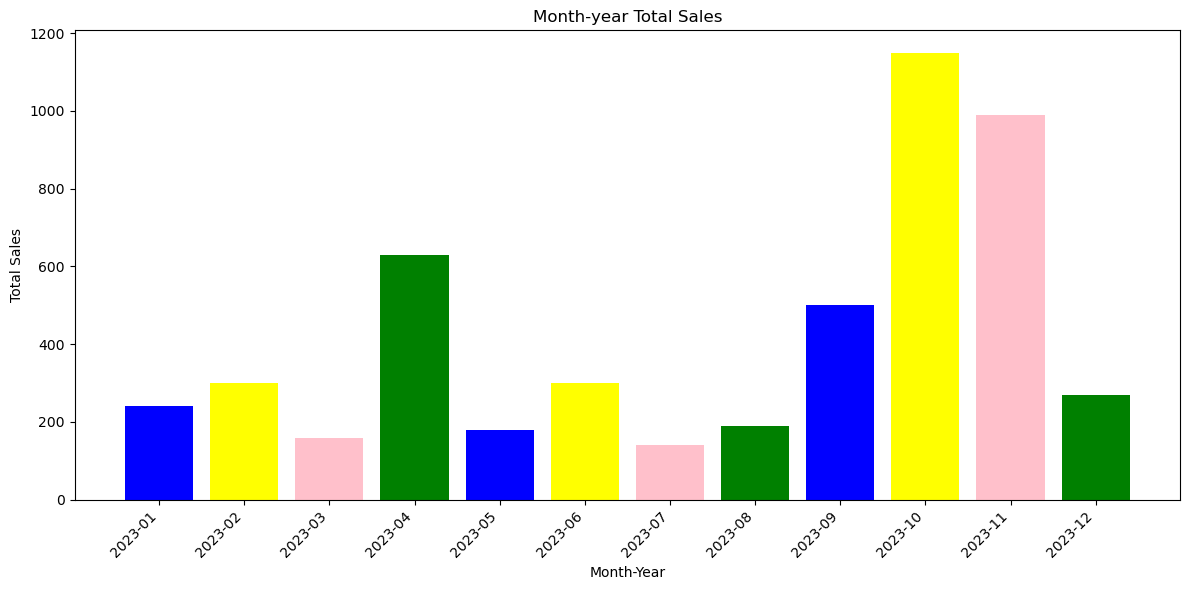

In [154]:
# Month and year wise total sales
order_data['total_sales']=merged_data['quantity']*merged_data['selling_price']


# Convert 'order_date' to datetime if it isn't already
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Extract month and year from 'order_date'
order_data['year_month'] = order_data['order_date'].dt.to_period('M')

# Calculate total sales month-wise
monthly_sales = order_data.groupby('year_month')['total_sales'].sum().reset_index()

# Convert 'year_month' back to string for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Plotting the month-wise total sales
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['year_month'], monthly_sales['total_sales'], color=['blue','yellow','pink','green'])

# Adding labels and title
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Month-year Total Sales')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


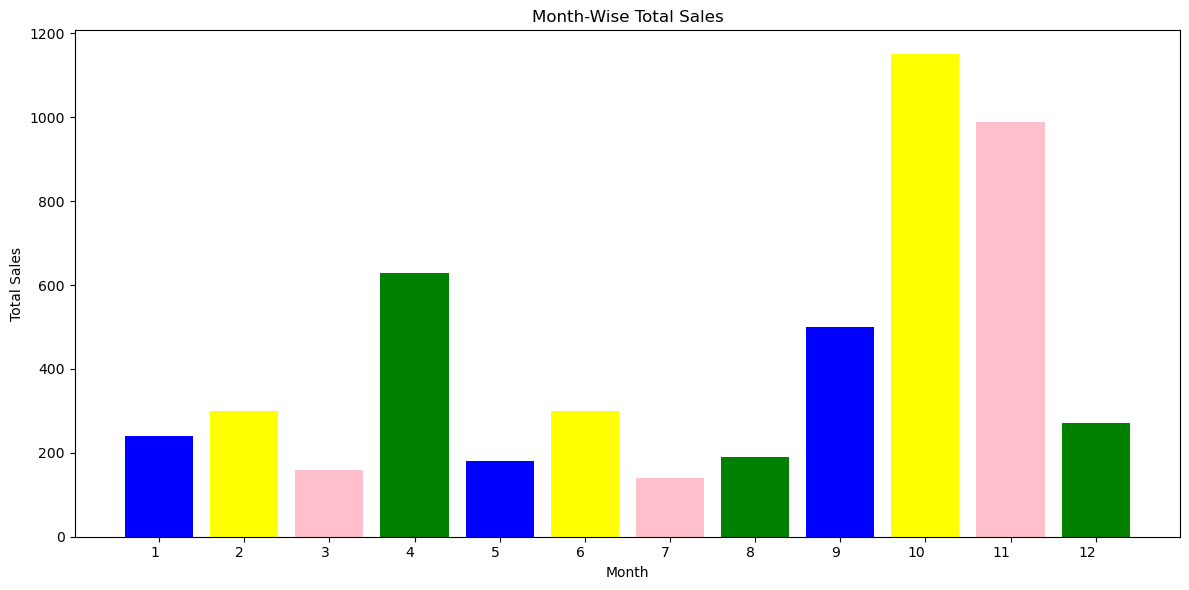

In [74]:
# Month wise total sales


# Convert 'order_date' to datetime if it isn't already
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
order_data['month']=order_data['order_date'].dt.month

monthly_sales=order_data.groupby('month')['total_sales'].sum().reset_index()


monthly_sales['month'] = monthly_sales['month'].astype(str)

# Plotting the month-wise total sales
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['month'], monthly_sales['total_sales'], color=['blue','yellow','pink','green'])

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month-Wise Total Sales')
plt.xticks(rotation=0, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

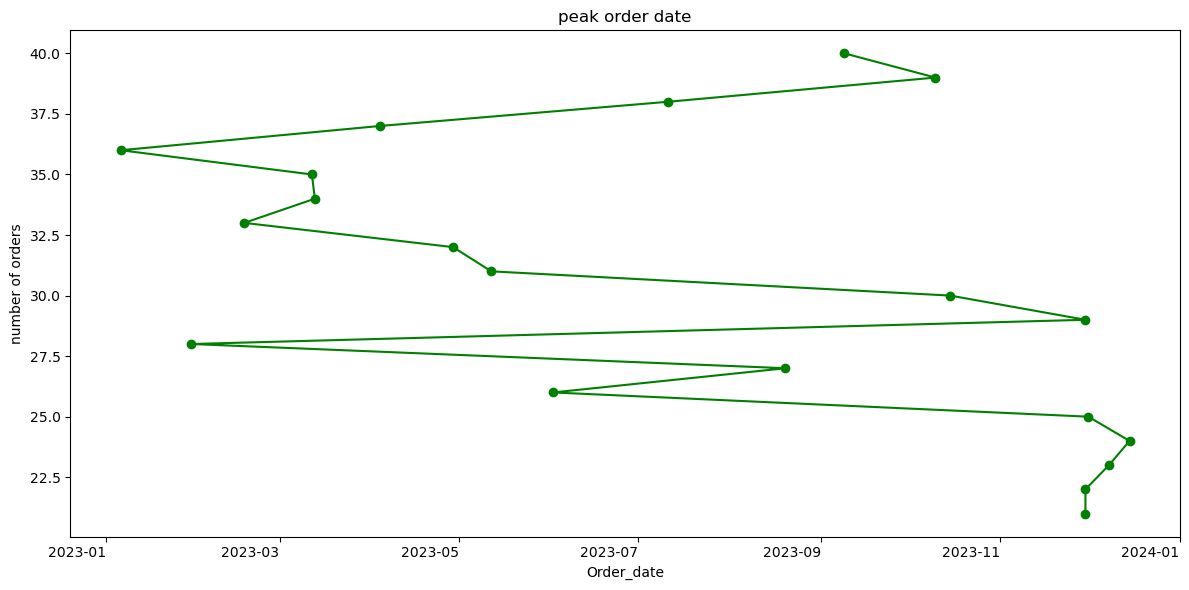

In [90]:
# identify peak order date
plt.figure(figsize=(12, 6))
plt.plot(order_data['order_date'],order_data['order_id'],marker='o',color='green')
plt.xlabel('Order_date')
plt.ylabel('number of orders')
plt.title('peak order date')
plt.xticks(rotation=0, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

Geographical Analysis:
● Explore the distribution of customers across different cities.
● Analyze whether certain products or categories are more popular in a
specific city.


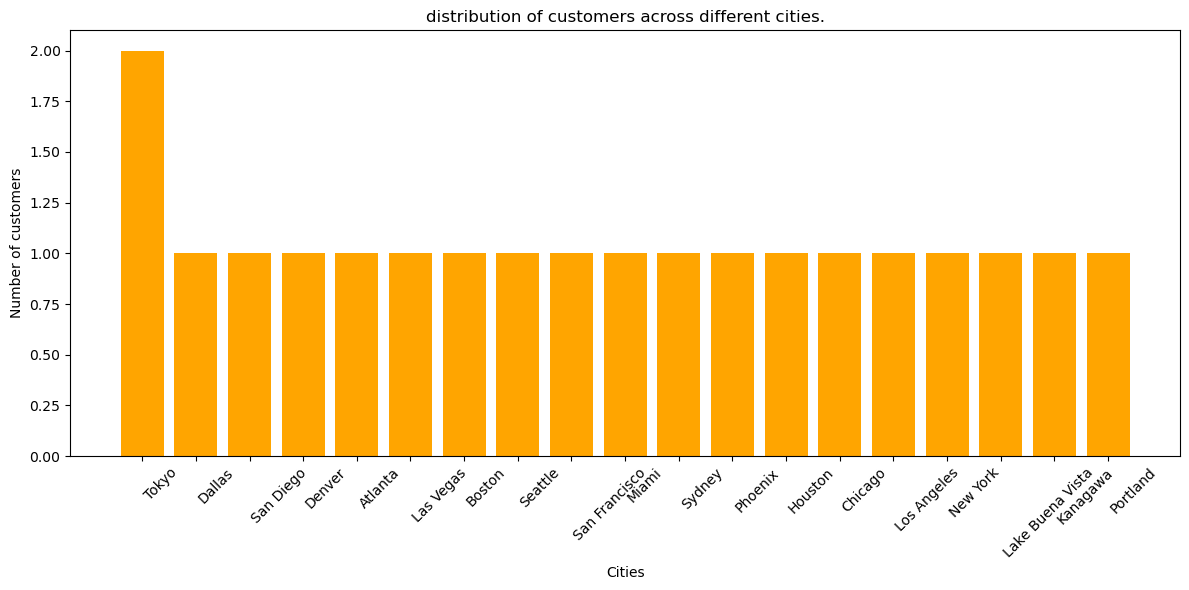

In [105]:
# Explore the distribution of customers across different cities.
customer_distribution_bycities=customer_data['city'].value_counts().reset_index()
customer_distribution_bycities.columns=['city','number_of_customers']

plt.figure(figsize=(12,6))
plt.bar(customer_distribution_bycities['city'],customer_distribution_bycities['number_of_customers'],color='orange',label='customers')
plt.xlabel('Cities')
plt.ylabel('Number of customers')
plt.xticks(rotation=45,ha='left')
plt.title('distribution of customers across different cities.')
plt.tight_layout()
plt.show()

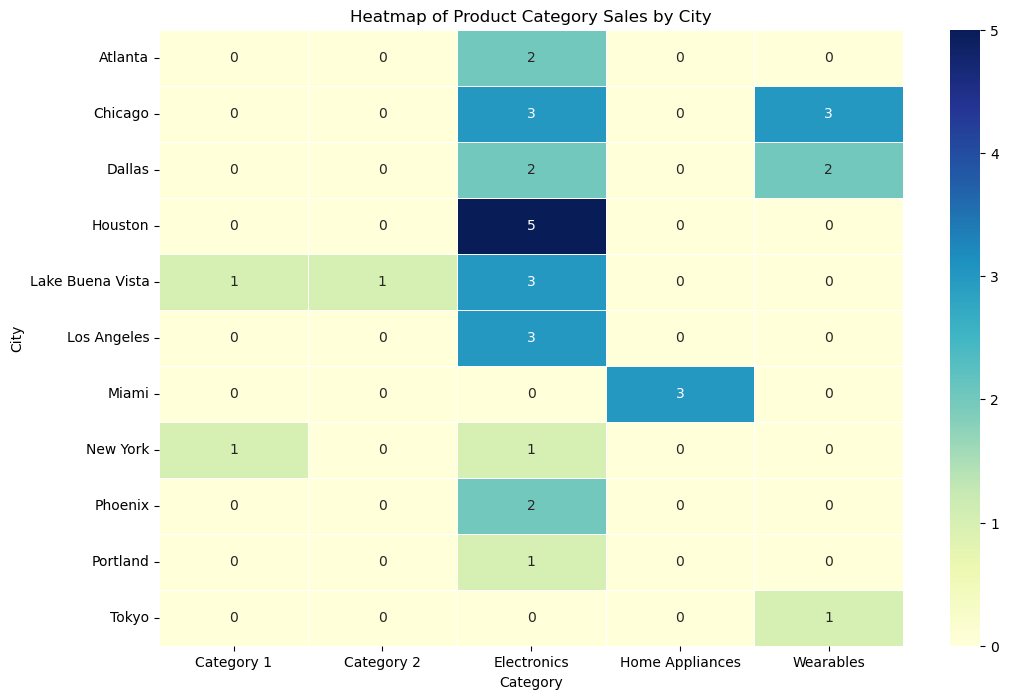

In [109]:
#  Analyze whether certain products or categories are more popular in a specific city.

import seaborn as sns
merged_data = pd.merge(order_data, customer_data, on='customer_id')

# Merge with product_data to get product details
merged_data = pd.merge(merged_data, product_data, on='product_id')

# Group by city and category, then calculate total quantity
city_category_sales = merged_data.groupby(['city', 'category'])['quantity'].sum().reset_index()

# Pivot the table for easier plotting
pivot_table = city_category_sales.pivot(index='city', columns='category', values='quantity').fillna(0)


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Product Category Sales by City')
plt.xlabel('Category')
plt.ylabel('City')
plt.show()


Product Performance:
● Identify the top 10 best-selling products.
● Identify top 10 slow-moving products based on low sales

                  product_name  revenue
13                      Tablet    900.0
8   Noise-Canceling Headphones    750.0
1               Digital Camera    750.0
12                  Smartwatch    720.0
4          External Hard Drive    300.0
7                  LED Monitor    300.0
9               Product Name 1    240.0
6              Gaming Keyboard    190.0
10              Product Name 2    180.0
5              Fitness Tracker    170.0


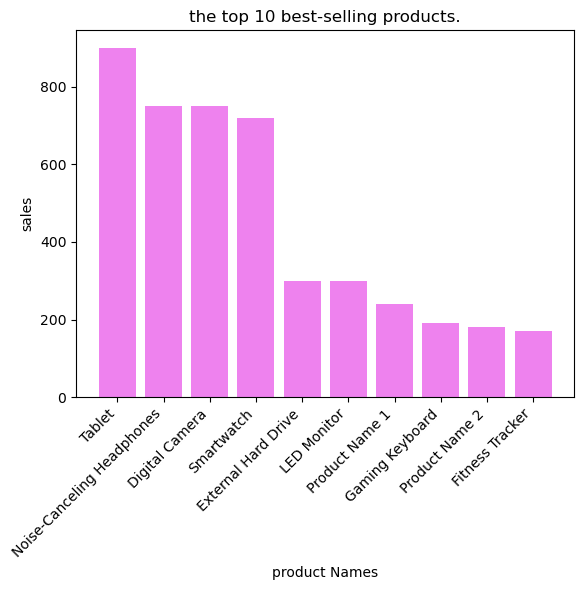

In [152]:
# Identify the top 10 best-selling products.

merged_data=pd.merge(product_data,order_data,on='product_id')
merged_data['revenue']=merged_data['quantity']*merged_data['selling_price']
sales=merged_data.groupby('product_name')['revenue'].sum().reset_index().sort_values(by='revenue',ascending=False).head(10)
print(sales)

plt.figure(figsize=(6,6))
plt.bar(sales['product_name'],sales['revenue'],color='violet')
plt.xlabel('product Names')
plt.ylabel('sales')
plt.xticks(rotation=45,ha='right')
plt.title('the top 10 best-selling products.')
plt.tight_layout()
plt.show()

            product_name  revenue
16        Wireless Mouse     25.0
15      Wireless Charger     40.0
0   Bluetooth Headphones     65.0
14             USB-C Hub     70.0
3        Electric Kettle     90.0
2          E-book Reader    120.0
11      Smart Thermostat    140.0
5        Fitness Tracker    170.0
10        Product Name 2    180.0
6        Gaming Keyboard    190.0


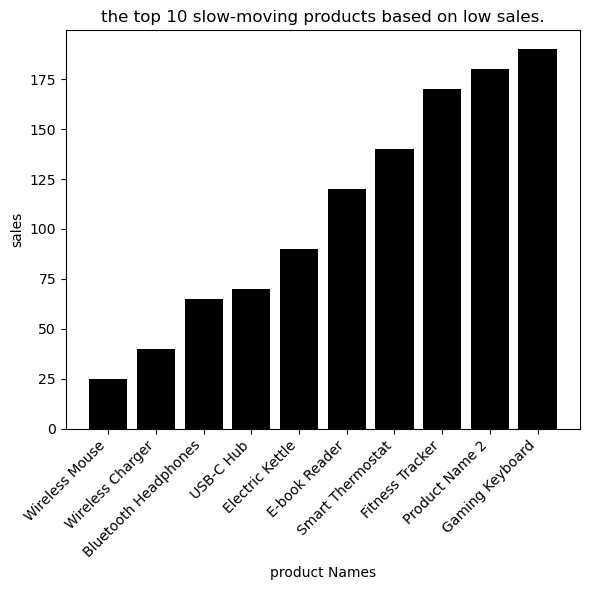

In [153]:
# Identify top 10 slow-moving products based on low sales

merged_data=pd.merge(product_data,order_data,on='product_id')
merged_data['revenue']=merged_data['quantity']*merged_data['selling_price']
sales=merged_data.groupby('product_name')['revenue'].sum().reset_index().sort_values(by='revenue',ascending=True).head(10)
print(sales)
plt.figure(figsize=(6,6))
plt.bar(sales['product_name'],sales['revenue'],color='black')
plt.xlabel('product Names')
plt.ylabel('sales')
plt.xticks(rotation=45,ha='right')
plt.title('the top 10 slow-moving products based on low sales.')
plt.tight_layout()
plt.show()

Customer Retention:
● Analyze repeat customers and their order patterns.**
● Calculate customer retention rates over time.

C:\Users\mshij\AppData\Local\Temp\ipykernel_17996\1933038060.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_order_data['order_week'] = repeat_order_data['order_date'].dt.isocalendar().week


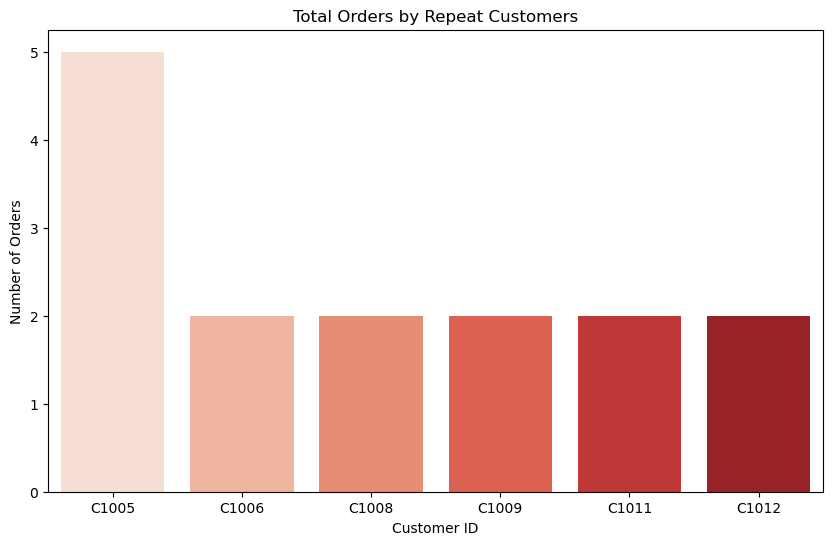

In [139]:
# Analyze repeat customers and their order patterns.

customer_order_count=order_data.groupby('customer_id')['order_id'].count().reset_index(name='order_count')
repeat_customers=customer_order_count[customer_order_count['order_count']>1]

repeat_order_data = order_data[order_data['customer_id'].isin(repeat_customers['customer_id'])]
repeat_order_data['order_week'] = repeat_order_data['order_date'].dt.isocalendar().week
weekly_order_patterns = repeat_order_data.groupby(['customer_id', 'order_week'])['order_id'].count().reset_index(name='weekly_orders')

total_orders = repeat_order_data.groupby('customer_id')['order_id'].count()

plt.figure(figsize=(10, 6))
sns.barplot(x=total_orders.index, y=total_orders.values, palette="Reds")
plt.title("Total Orders by Repeat Customers")
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders")
plt.show()






Customer Retention Rates:
 order_month           2023-01  2023-02  2023-03  2023-04  2023-05  2023-06  \
first_purchase_month                                                         
2023-01                 100.0      0.0     50.0      0.0      0.0     50.0   
2023-02                   0.0      0.0      0.0      0.0      0.0      0.0   
2023-03                   0.0      0.0      0.0      0.0      0.0      0.0   
2023-04                   0.0      0.0      0.0      0.0      0.0      0.0   
2023-05                   0.0      0.0      0.0      0.0      0.0      0.0   
2023-08                   0.0      0.0      0.0      0.0      0.0      0.0   
2023-10                   0.0      0.0      0.0      0.0      0.0      0.0   
2023-11                   0.0      0.0      0.0      0.0      0.0      0.0   
2023-12                   0.0      0.0      0.0      0.0      0.0      0.0   

order_month           2023-07  2023-08  2023-09  2023-10  2023-11  2023-12  
first_purchase_month                 

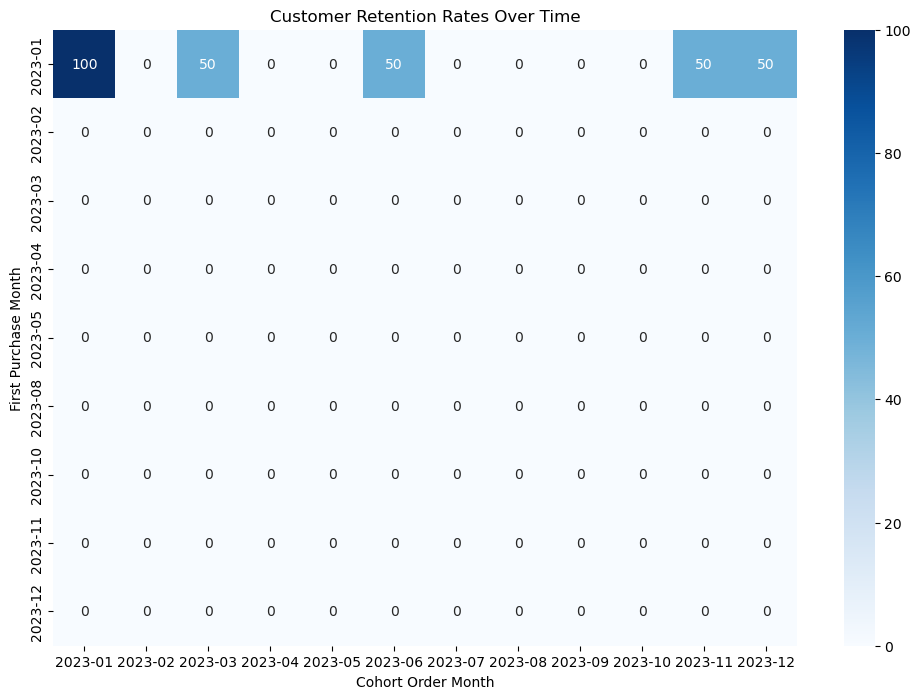

In [141]:
# Customer retention over time

# Extract year and month
order_data['order_month'] = order_data['order_date'].dt.to_period('M')

# Get the first purchase month for each customer
order_data['first_purchase_month'] = order_data.groupby('customer_id')['order_month'].transform('min')

# Create a cohort label for each customer based on their first purchase month
cohorts = order_data.groupby(['first_purchase_month', 'order_month']).agg(n_customers=('customer_id', 'nunique')).reset_index()

# Pivot to get a retention table
cohort_pivot = cohorts.pivot_table(index='first_purchase_month', columns='order_month', values='n_customers')

# Divide each row by the first column to calculate retention rates
cohort_size = cohort_pivot.iloc[:, 0]
retention_rate = cohort_pivot.divide(cohort_size, axis=0)
retention_rate = retention_rate.fillna(0) * 100  # Convert to percentage

print("Customer Retention Rates:\n", retention_rate)


# Divide each row by the first column to calculate retention rates
cohort_size = cohort_pivot.iloc[:, 0]
retention_rate = cohort_pivot.divide(cohort_size, axis=0)
retention_rate = retention_rate.fillna(0) * 100  # Convert to percentage

print("Customer Retention Rates:\n", retention_rate)



plt.figure(figsize=(12, 8))
sns.heatmap(retention_rate, annot=True, fmt=".0f", cmap="Blues")
plt.title('Customer Retention Rates Over Time')
plt.xlabel('Cohort Order Month')
plt.ylabel('First Purchase Month')
plt.show()


Payment Analysis:
● Display successful and pending payments order counts.

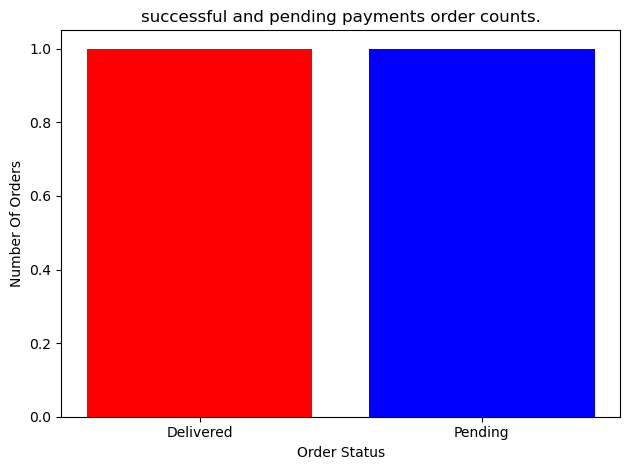

In [151]:
# Display successful and pending payments order counts.

payment_status=order_data.groupby('order_status')['order_id'].value_counts().reset_index(name='number_of_orders')

colors=['blue' if status=='Pending' else 'red' if status=='Delivered' else 'grey' for status in payment_status['order_status']]
plt.bar(payment_status['order_status'],payment_status['number_of_orders'],color=colors)
plt.xlabel('Order Status')
plt.ylabel('Number Of Orders')
plt.title('successful and pending payments order counts.')
plt.tight_layout()
plt.show()


 (Insights)

Customer Analysis
   1. Tokyo has the largest number of customers.
   2. Number of customers who place orders are significant.
   
 
Product Analysis:
   1. Electronic products are more in quantity.
   2. sub-category of products like 'Audio' and 'Computer Acessories' are more in number.
   3. Products like 'fitness tracer' and 'electric kettel' has low stock prices.
   4. Average Prices:
      original_price    109.50
      selling_price     133.25
      dtype: float64

      Maximum Prices:
      original_price    300.0
      selling_price     350.0
      dtype: float64

      Minimum Prices:
      original_price    20.0
      selling_price     25.0
Order Analysis:
● Calculate the top 10 orders product wise.
 1.      product_name              no_of_orders
16              Wireless Mouse             1
15            Wireless Charger             1
14                   USB-C Hub             1
13                      Tablet             1
12                  Smartwatch             2
11            Smart Thermostat             1
10              Product Name 2             1
9               Product Name 1             2
8   Noise-Canceling Headphones             2
7                  LED Monitor             1
6              Gaming Keyboard             1
5              Fitness Tracker             1
4          External Hard Drive             1
3              Electric Kettle             1
2                E-book Reader             1
1               Digital Camera             1
0         Bluetooth Headphones             1

● Analyze the order status distribution (e.g., pending, delivered).
  1. Almost equal
● Identify the most popular products based on order quantity.
Sales Analysis:
  1. Smart watches and Noise calcellation headphones.
● Calculate total revenue generated from orders product wise.
  1. Smart thermostat highest revenue and product name 1 with the lowest.
● Calculate the total revenue generated from all orders.
  1. Almost equal suggested by the graph.
● Calculate total revenue product category wise percentage.
  1. Electronics(69.5%), Wearables(17.6%), category-1(4.8%), Homeappliance (4.6%), category-2(3.9%).
● Analyze the performance of different product categories in terms of sales.
● Identify the most profitable products based on the difference between
original and selling prices.
 1. Electronic products are the most profitable.
Customer Order Patterns:
● Identify product names with the highest and lowest order quantities.
 1. Smartwatches are with the higest order quantities
● Identify customers with the highest and lowest order quantities by
customer name.
 1. Charlie with the higest order quantities, jackson and oscar with the lowest order quantities.
● Determine the most preferred payment modes.
 1. COD
Time-based Analysis:
● Month wise total sales.
  1. Least sales in 'july' and Most sales in 'September' 
● Month and year wise total sales
  1. Least sales in 'july' and Most sales in 'September'
● Identify peak order date.
Geographical Analysis:
● Explore the distribution of customers across different cities.
● Analyze whether certain products or categories are more popular in a
specific city.
Product Performance:
● Identify the top 10 best-selling products.
  1.  product_name  revenue
         Tablet    900.0     Noise-Canceling Headphones    750.0                 Digital Camera    750.0
         Smartwatch    720.0            External Hard Drive    300.0
        LED Monitor    300.0
        Product Name 1    240.0
        Gaming Keyboard    190.0
        Product Name 2    180.0
        Fitness Tracker    170.0
        
● Identifid top 10 slow-moving products based on low sales.
  1.           product_name  revenue
            Wireless Mouse     25.0
            Wireless Charger   40.0
            Bluetooth Headphones 65.0
            USB-C Hub           70.0
            Electric Kettle     90.0
            E-book Reader      120.0
            Smart Thermostat    140.0
            Fitness Tracker    170.0
            Product Name 2    180.0
            Gaming Keyboard    190.0
Customer Retention:
● Analyze repeat customers and their order patterns.
  1. customer_id: C1005 makes more number of orders
● Calculate customer retention rates over time.
Payment Analysis:
● Display successful and pending payments order counts are mostly equal and close.
